# Sales Forecasting Using Machine Learning

This project forecasts car purchase amounts based on customer demographics and financial features.

## Dataset
- Car purchasing dataset with 500 entries.
- Features: country, gender, age, salary, credit card debt, net worth.

## Steps
- Data Cleaning
- EDA & Visualizations
- Feature Encoding and Scaling
- Model Building: Linear Regression, Random Forest, XGBoost
- Evaluation: MAE, RMSE, R²
- Final Visualizations: Correlation heatmap, Feature Importance

## Best Model
- XGBoost with R² Score ≈ 0.98

## Requirements


In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# 2. Load the data
df = pd.read_csv('/content/archive (20).zip', encoding='latin1')


In [3]:

# 3. Initial data cleaning
df.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)

In [4]:
# 4. Encode categorical data
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])  # Encoding countries as number

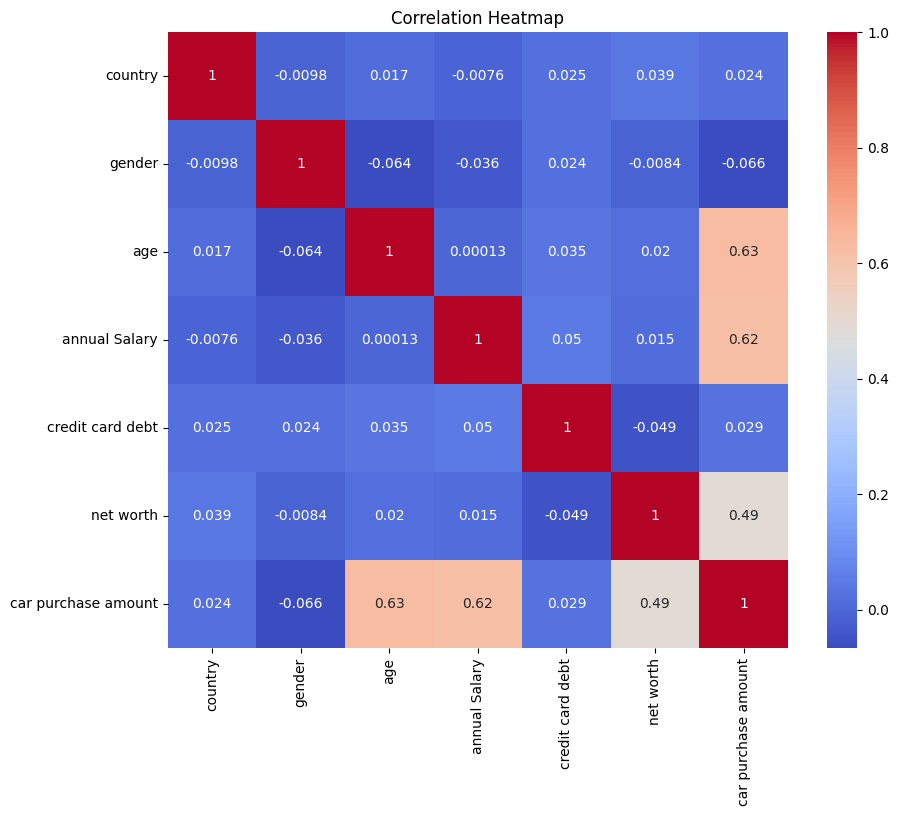

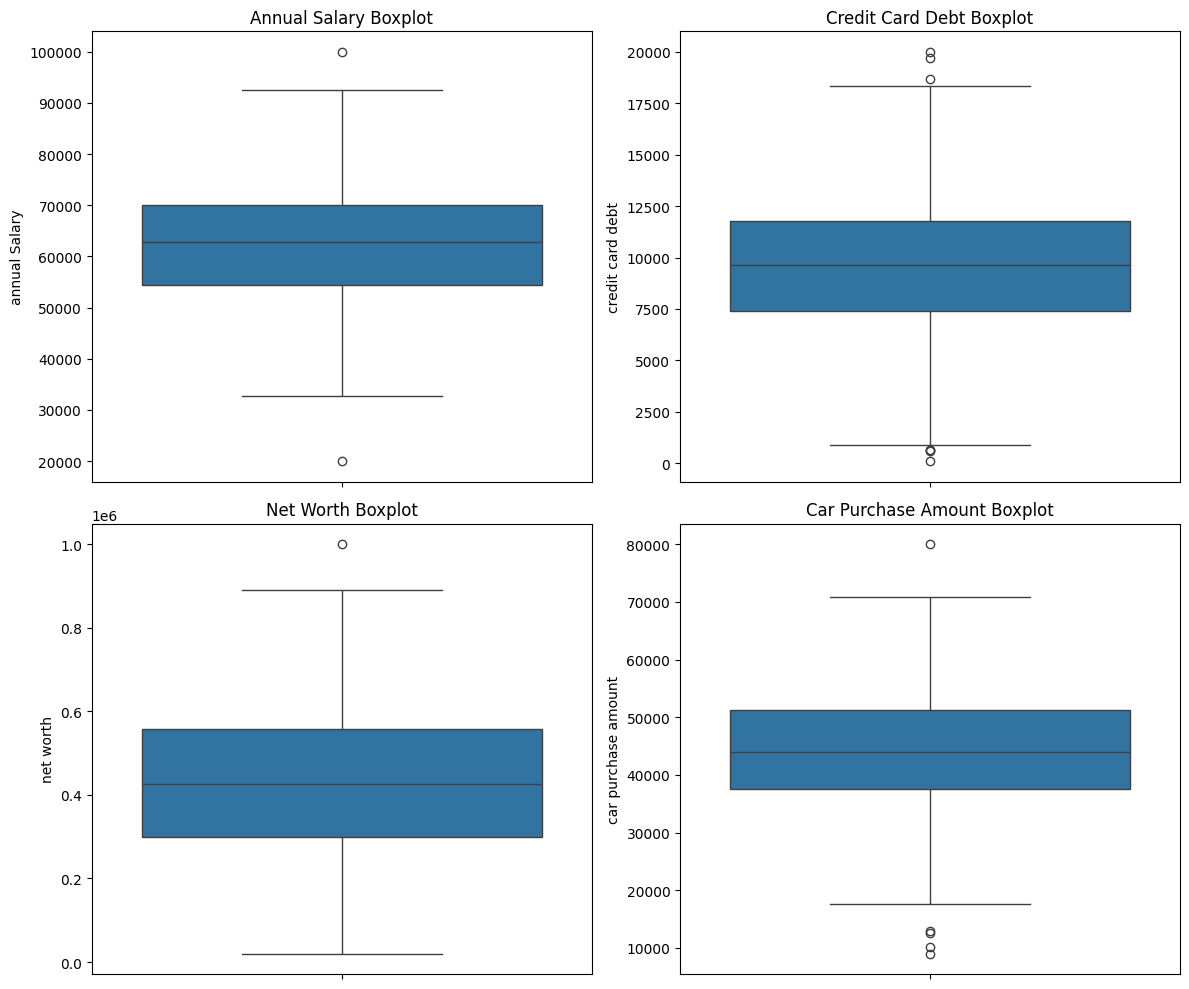

In [5]:
# 5. EDA (Visualizations)
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Outlier Detection
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.boxplot(y='annual Salary', data=df, ax=axes[0,0])
axes[0,0].set_title('Annual Salary Boxplot')

sns.boxplot(y='credit card debt', data=df, ax=axes[0,1])
axes[0,1].set_title('Credit Card Debt Boxplot')

sns.boxplot(y='net worth', data=df, ax=axes[1,0])
axes[1,0].set_title('Net Worth Boxplot')

sns.boxplot(y='car purchase amount', data=df, ax=axes[1,1])
axes[1,1].set_title('Car Purchase Amount Boxplot')

plt.tight_layout()
plt.show()


In [6]:
# 6. Feature Scaling
scaler = StandardScaler()
features = ['country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth']
X = scaler.fit_transform(df[features])
y = df['car purchase amount']

In [7]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 8. Model Building

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [9]:
# 9. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"---{model_name}---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print()

# Evaluate all models
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")


---Linear Regression---
MAE: 1.16
RMSE: 1.45
R² Score: 1.00

---Random Forest---
MAE: 1638.64
RMSE: 2353.29
R² Score: 0.95

---XGBoost---
MAE: 1589.18
RMSE: 2185.98
R² Score: 0.96



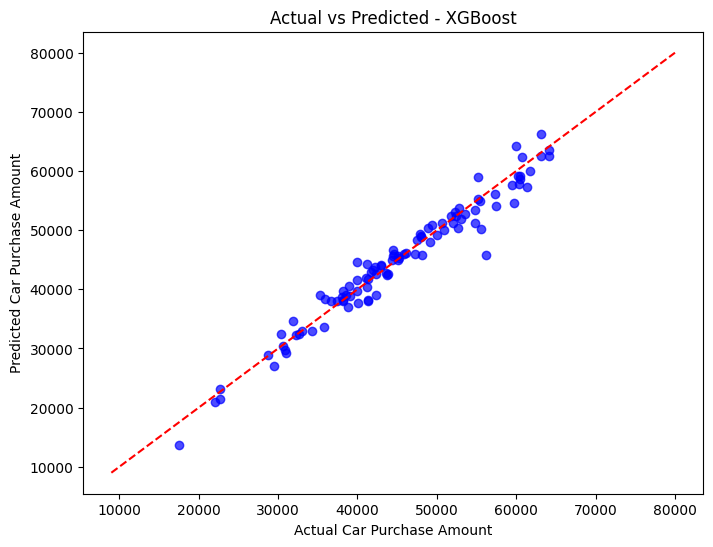

In [10]:
# 10. Visualizations: Actual vs Predicted

# Plot for XGBoost (Best model usually)
plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_preds, alpha=0.7, color='b')
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs Predicted - XGBoost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


<ipython-input-11-a425708366b2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


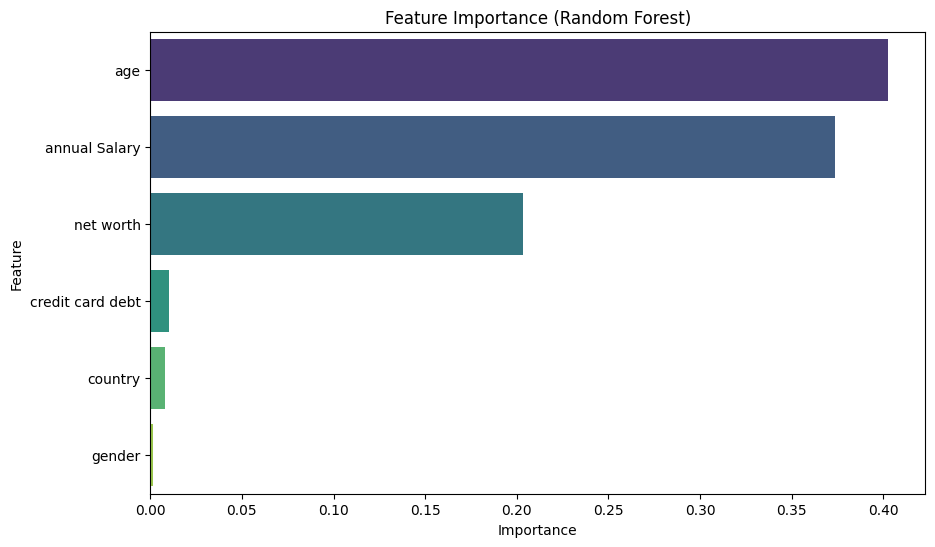

In [11]:
# 11. Feature Importance (Random Forest Example)
importances = rf_model.feature_importances_
feat_names = ['country', 'gender', 'age', 'annual Salary', 'credit card debt', 'net worth']

importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()